# Lab 2. Linear Regression


**Author:** *Gabriel Szewczyk*</br>
**Date:** *11.03.2024*

import essential libraries

In [43]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

read *measurements.csv* file

In [44]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)


visualize input data:

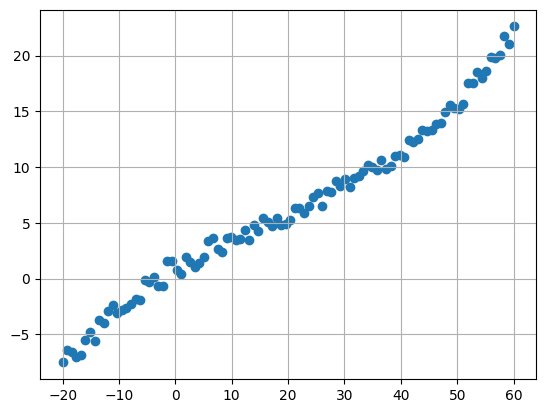

In [45]:
x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)
plt.grid()
plt.show()

## Linear regression of one variable.

function *h_fun* which calculates predicted values for a vector x:

In [46]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return [theta_0 + theta_1*x[ind] for ind in range(len(x))]


function *calculate_cost* that computes the cost value for given model parameters:

In [47]:
def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    m = len(x) # training set size
    x_predicted = h_fun(x, theta_0, theta_1)
    J_unit_fun = lambda temp_x, temp_y: (1/(2*m))*(temp_x-temp_y) # cost function by unit
    J_theta = [J_unit_fun(x, y) for x, y in zip(x_predicted, y)] # values for rate
    return sum(J_theta) # sum up values for function value


Control parameters for an optimization algorithm and the parameters defining a mode:

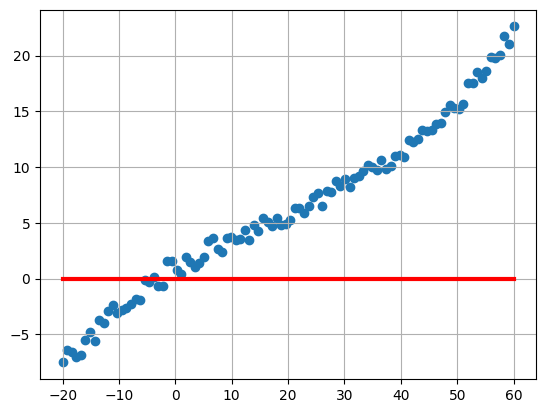

In [48]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

def lg_plot(x, y, eps, alpha, theta_0, theta_1):
    plt.scatter(x, y)
    plt.grid()
    plt.plot(x, (theta_0 + theta_1*x), color='red', linewidth=3)
    plt.show()
lg_plot(x, y, eps, alpha, theta_0, theta_1)

Implementation of the gradient descent algorithm for finding the optimal weights for a linear regression model:

number of iterations:  615
Theta values: -0.01892, 0.31593
cost: 0.01734


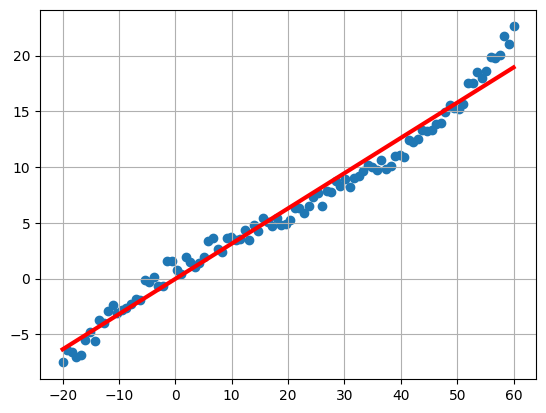

In [49]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0
cost_before = 0
current_cost = 1000
count = 0

while abs(current_cost - cost_before) > eps: # with abs output is more precise, but iterates much more times
    cost_before = calculate_cost(x, y, theta_0, theta_1)
    theta_0 = theta_0 - ((alpha/len(x))*sum(h_fun(x, theta_0, theta_1) - y))
    theta_1 = theta_1 - ((alpha/len(x))*sum((h_fun(x, theta_0, theta_1) - y)*x))
    current_cost = calculate_cost(x, y, theta_0, theta_1)
    count +=1

print("number of iterations: ", count) # number of iterations
print(f"Theta values: {round(theta_0, 5)}, {round(theta_1, 5)}") # counted values
print(f"cost: {round(current_cost, 5)}") # estimated minimal cost
lg_plot(x, y, eps, alpha, theta_0, theta_1)
# θ0 = 0.0065, θ1 = 0.3154, J = 0.6392 values observed for epsilon = 1e-2

## Multiple linear regression

Prepare matrices

In [50]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]
theta = np.array([[0], [0]])
print(X.shape)
print(y.shape)

(2, 100)
(1, 100)


Adapting previous functions for operations on multiple variables

In [51]:
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return (theta.T @ X)

In [52]:
def calculate_cost_2(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = X.shape[-1] # training set size
    X_predicted = h_fun(X, theta)
    J_unit_fun = lambda temp_X, temp_y: (1/(2*m))*(temp_X-temp_y) # cost function by unit
    J_theta = [J_unit_fun(x, y) for x, y in zip(X_predicted, y)] # values for rate
    return sum(sum((1/(2*m))*(X_predicted-y))) # sum up values for function value

Gradient descent algorithm in multiple regression case, testing on previous example

In [53]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
theta = np.array([[0], [0]])
cost_before = 0
current_cost = 1000
count = 0

while abs(current_cost - cost_before) > eps: # with abs output is more precise, but iterates much more times
    cost_before = calculate_cost_2(X, y, theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha * gradient.T / X.shape[-1]
    current_cost = calculate_cost_2(X, y, theta)
    count += 1

print("number of iterations: ", count) # number of iterations
print(f"Theta values: {np.round(theta[0], 5)}, {np.round(theta[1], 5)}") # counted values
print(f"cost: {round(current_cost, 5)}") # estimated minimal cost
# θ0 = 0.0065, θ1 = 0.3154, J = 0.6392 values observed for epsilon = 1e-2

number of iterations:  614
Theta values: [-0.01887], [0.31592]
cost: 0.01734


The results match the previous ones. Let's apply the algorithm to another dataset.

Read data from *housing.txt*:

In [54]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T

Scaling loaded data due to different ranges of features

In [55]:
y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

Gradient descent algorithm on *housing dataset*

In [56]:
eps = 1e-10  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
theta = np.array([[0], [0], [0]])
cost_before = 0
current_cost = 1000
count = 0

while abs(current_cost - cost_before) > eps: # with abs output is more precise, but iterates much more times
    cost_before = calculate_cost_2(X, y, theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha * gradient.T / X.shape[-1]
    current_cost = calculate_cost_2(X, y, theta)
    count += 1

print("number of iterations: ", count) # number of iterations
print(f"Theta values: {np.round(theta[0], 5)}, {np.round(theta[1], 5)}, {np.round(theta[2], 5)}") # counted values
print(f"cost: {round(current_cost, 5)}") # estimated minimal cost

number of iterations:  5108
Theta values: [0.26972], [0.2172], [0.19862]
cost: 0.00316


Rescaling features back, output

In [57]:
example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example/X_scale) * y_scale
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 344118.0481441404


## Polynomial regression

Preparing the matrix X where consecutive rows are combinations of nonlinear transformations of the original feature

In [58]:
x = data[:, 0]
y = data[:, 1]
X = np.vstack([np.ones(x.shape), x, x**2, x**3])

Scaling data

In [59]:
X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
 
y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

Validate wheter predictor variables have proper size

In [60]:
theta = np.array([[0], [0], [0], [0]])
print(y.shape)
print(X.shape)
print(theta.shape)
h = h_fun(X, theta)
print(h.shape)

(1, 100)
(4, 100)
(4, 1)
(1, 100)


Gradient descent algorithm on polynomial regerssion case for *measurements* database

In [61]:
eps = 1e-10  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
theta = np.array([[0], [0], [0], [0]])
alpha = 1e-3
cost_before = 0
current_cost = 1000
count = 0

while abs(current_cost - cost_before) > eps: # with abs output is more precise, but iterates much more times
    cost_before = calculate_cost_2(X, y, theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha * gradient.T / X.shape[-1]
    current_cost = calculate_cost_2(X, y, theta)
    count += 1

print("number of iterations: ", count) # number of iterations
print(f"Theta values: {np.round(theta[0], 5)}, {np.round(theta[1], 5)}, {np.round(theta[2], 5)}, {np.round(theta[3], 5)}") # counted values
print(f"cost: {round(current_cost, 5)}") # estimated minimal cost



number of iterations:  136151
Theta values: [-0.00122], [0.70762], [0.03084], [0.18252]
cost: -1e-05


Rescaling features back

In [62]:
X = X * X_scale
y = y * y_scale
predicted_y = (theta.T @ (X/X_scale) * y_scale).T

Visualize polynomial regression

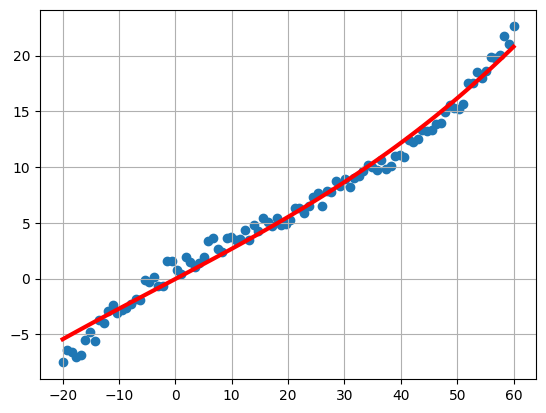

In [63]:
    plt.scatter(x, y)
    plt.grid()
    plt.plot(x, (predicted_y), color='red', linewidth=3)
    plt.show()